In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv('training_set_features.csv')

In [3]:
df

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
print(df.isnull().sum())

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [5]:
df.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [6]:
feature_cols = [col for col in df.columns ]


cat_cols = [col for col in feature_cols if df[col].dtype == 'O']
cont_cols = [col for col in feature_cols if col not in cat_cols]

In [7]:
df['xyz_concern'].isnull().sum()

92

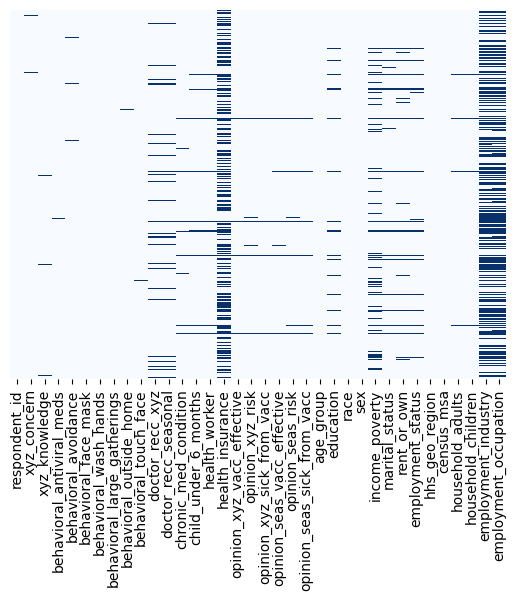

In [8]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [9]:
knn_imputer = KNNImputer(n_neighbors=5)

df[cont_cols] = knn_imputer.fit_transform(df[cont_cols])

In [10]:
print(df.isnull().sum())

respondent_id                      0
xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [11]:
df['race'].value_counts()

race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64

In [12]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
Sex_converted_variable=pd.get_dummies(df['sex'],drop_first=True,dtype=int)

In [14]:
Sex_converted_variable

,Male
0,0
1,1
2,1
3,0
4,0
...,...
26702,0
26703,1
26704,0
26705,0


In [15]:
df=pd.concat([df,Sex_converted_variable],axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,Male
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [16]:
df['race'].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [17]:
le = LabelEncoder()
df['encoded_race'] = le.fit_transform(df['race'])
df['encoded_ageGroup'] = le.fit_transform(df['age_group'])
df['encoded_employmentStat'] = le.fit_transform(df['employment_status'])

In [18]:
df

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,Male,encoded_race,encoded_ageGroup,encoded_employmentStat
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,3,3,1
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,3,1,0
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1,3,0,0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,3,4,1
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,3,4,1
26703,26703.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,1,3,0,0
26704,26704.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,3,3,3
26705,26705.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,...,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,1,0,0


In [19]:
df.drop(cat_cols,axis=1,inplace=True)

In [20]:
print(df.isnull().sum())

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
Male                           0
encoded_race                   0
encoded_ageGroup               0
encoded_employmentStat         0
dtype: int64


In [21]:
df.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,Male,encoded_race,encoded_ageGroup,encoded_employmentStat
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.618250,1.262538,0.048796,0.725555,0.068986,0.825589,0.358558,0.337305,0.677253,...,2.357592,4.026368,2.719542,2.118366,0.887026,0.534302,0.406223,2.570300,2.186131,0.656232
std,7709.791156,0.909091,0.617008,0.215300,0.444787,0.253352,0.379197,0.479005,0.472228,0.466663,...,1.354524,1.079127,1.374630,1.322049,0.750564,0.924583,0.491136,0.923226,1.457320,0.814312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,3.000000,4.000000,3.000000


In [22]:
df

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,Male,encoded_race,encoded_ageGroup,encoded_employmentStat
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,2.0,1.0,2.0,0.0,0.0,0,3,3,1
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,4.0,2.0,4.0,0.0,0.0,1,3,1,0
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,2.0,2.0,0.0,1,3,0,0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5.0,5.0,4.0,1.0,0.0,0.0,0,3,4,1
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,2.0,3.0,1.0,4.0,1.0,0.0,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,2.0,2.0,0.0,0.0,0,3,4,1
26703,26703.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,5.0,1.0,1.0,1.0,0.0,1,3,0,0
26704,26704.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,2.0,5.0,4.0,2.0,0.0,0.0,0,3,3,3
26705,26705.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,...,2.0,2.0,1.0,2.0,1.0,0.0,0,1,0,0


In [23]:
X= df

In [24]:
Y = pd.read_csv('training_set_labels.csv')

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
clf = MultinomialNB()

In [26]:
X_train, X_test, xyz_train, xyz_test = train_test_split(X, Y['xyz_vaccine'], test_size=0.5, random_state=0)
X_train, X_test, seasonal_train, seasonal_test = train_test_split(X, Y['seasonal_vaccine'], test_size=0.5, random_state=0)

In [27]:
df_test = pd.read_csv('test_set_features.csv')

In [28]:
print(df_test.isnull().sum())

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [29]:
feature_cols1 = [col for col in df_test.columns ]


cat_cols1 = [col for col in feature_cols1 if df_test[col].dtype == 'O']
cont_cols1 = [col for col in feature_cols1 if col not in cat_cols1]

In [30]:
knn_imputer = KNNImputer(n_neighbors=5)

df_test[cont_cols1] = knn_imputer.fit_transform(df_test[cont_cols1])

In [31]:
print(df_test.isnull().sum())

respondent_id                      0
xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [32]:
Sex_converted_variable1=pd.get_dummies(df_test['sex'],drop_first=True,dtype=int)
df_test=pd.concat([df_test,Sex_converted_variable1],axis=1)


In [33]:
le = LabelEncoder()
df_test['encoded_race'] = le.fit_transform(df_test['race'])
df_test['encoded_ageGroup'] = le.fit_transform(df_test['age_group'])
df_test['encoded_employmentStat'] = le.fit_transform(df_test['employment_status'])

In [34]:
df_test.drop(cat_cols,axis=1,inplace=True)

In [35]:
df_test

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,Male,encoded_race,encoded_ageGroup,encoded_employmentStat
0,26707.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,5.0,1.0,1.0,1.0,0.0,0,1,1,0
1,26708.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,1.0,3.0,0.0,1,3,0,0
2,26709.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2.0,5.0,4.0,4.0,1.0,0.0,1,3,3,0
3,26710.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,4.0,2.0,1.0,0.0,0,3,4,1
4,26711.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,4.0,4.0,4.0,2.0,0.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,2.0,4.0,2.0,1.0,1.0,1.0,0,3,1,3
26704,53411.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,5.0,2.0,2.0,1.0,3.0,1,3,0,0
26705,53412.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,3.0,1.0,1.0,0.0,0,3,0,1
26706,53413.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,4.0,4.0,3.0,2.0,1.0,0.0,0,3,3,1


In [36]:
X_test_imp = df_test

In [37]:
from sklearn.linear_model import LogisticRegression


In [38]:
clf2 = LogisticRegression()

In [39]:
clf2.fit(X_train, xyz_train)


C:\Users\hp\Anacondas\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
score = clf2.score(X_test, xyz_test)


In [41]:
score

0.8052268983076232

In [42]:
Y_pred_xyz2 = clf2.predict_proba(X_test)


In [43]:
Y_prob_xyz2 = Y_pred_xyz2.round(2)



In [44]:
print("AUC-ROC:", roc_auc_score(xyz_test, Y_prob_xyz2[:,1]))



AUC-ROC: 0.7570477999253653


In [45]:
Y_test_xyz2 = clf2.predict(X_test_imp)


In [46]:
Y_pred_xyz_test2 = clf2.predict_proba(X_test_imp)


In [47]:
Y_pred_xyz_test2 = Y_pred_xyz_test2.round(2)


In [48]:
print("AUC-ROC:", roc_auc_score(Y_test_xyz2, Y_pred_xyz_test2[:,1]))


AUC-ROC: 0.9999698718598762


In [49]:
soln2 = pd.read_csv('submission_format.csv')

In [50]:
row1 = pd.Series(Y_pred_xyz_test2[:,1] ).round(1)


In [51]:
soln2['xyz_vaccine']= row1


In [52]:
soln2

,respondent_id,h1n1_vaccine,seasonal_vaccine,xyz_vaccine
0,26707,0.5,0.7,0.1
1,26708,0.5,0.7,0.1
2,26709,0.5,0.7,0.2
3,26710,0.5,0.7,0.4
4,26711,0.5,0.7,0.3
...,...,...,...,...
26703,53410,0.5,0.7,0.1
26704,53411,0.5,0.7,0.0
26705,53412,0.5,0.7,0.1
26706,53413,0.5,0.7,0.0


In [53]:
clf2.fit(X_train,seasonal_train)

LogisticRegression()

In [54]:
score2=clf2.score(X_test,seasonal_test)

In [55]:
Y_pred_season2 = clf2.predict_proba(X_test)

In [56]:
Y_prob_season2 = Y_pred_season2.round(2)

In [57]:
print("AUC-ROC:", roc_auc_score(seasonal_test, Y_prob_season2[:,1]))

AUC-ROC: 0.785073905123615


In [58]:
Y_test_season2 = clf2.predict(X_test_imp)

In [59]:
Y_pred_season_test2 = clf2.predict_proba(X_test_imp)

In [60]:
Y_pred_season_test2 = Y_pred_season_test2.round(2)

In [61]:
print("AUC-ROC:", roc_auc_score(Y_test_season2,Y_pred_season_test2[:,1]))

AUC-ROC: 0.9999412151481585


In [ ]:
/*regression*/

In [62]:
row2 =  pd.Series(Y_pred_season_test2[:,1] ).round(1)

In [63]:
soln2['seasonal_vaccine'] = row2

In [64]:
soln2.drop(['h1n1_vaccine'],inplace = True,axis=1)

In [65]:
soln2.to_csv('solution.csv')

In [66]:
soln2

,respondent_id,seasonal_vaccine,xyz_vaccine
0,26707,0.3,0.1
1,26708,0.1,0.1
2,26709,0.5,0.2
3,26710,0.8,0.4
4,26711,0.6,0.3
...,...,...,...
26703,53410,0.2,0.1
26704,53411,0.1,0.0
26705,53412,0.3,0.1
26706,53413,0.4,0.0
